# Preparing data set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install kaggle


In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajmohammad","key":"34ce0e8c4781a9daf8414c4dd9ed4629"}'}

In [7]:
dataset_path = '/content/drive/My Drive/CelebA/'

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 98% 1.31G/1.33G [00:08<00:00, 248MB/s]
100% 1.33G/1.33G [00:08<00:00, 173MB/s]


In [10]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

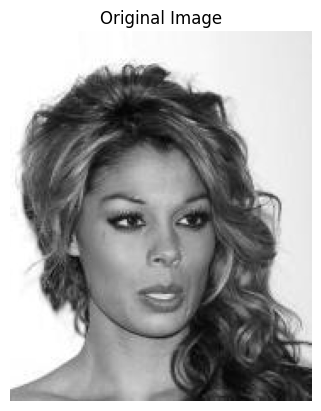

In [13]:
import cv2
import matplotlib.pyplot as plt
import os
dataset_path='/content/img_align_celeba/img_align_celeba/'

image_path = os.path.join(dataset_path, '000006.jpg')
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [34]:
dataset_path = '/content/img_align_celeba/img_align_celeba/'

input_folder = os.path.join('/content/CelebA/', 'input_images')
output_folder = os.path.join('/content/CelebA/', 'sobel_images')
output_folder1 = os.path.join('/content/CelebA/', 'sobel_images1')
# output_folder2 = os.path.join('/content/CelebA/', 'final_output')

os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder1, exist_ok=True)
# os.makedirs(output_folder2, exist_ok=True)

print(f"Created directories:\n{input_folder}\n{output_folder}\n{output_folder1}")


Created directories:
/content/CelebA/input_images
/content/CelebA/sobel_images
/content/CelebA/sobel_images1


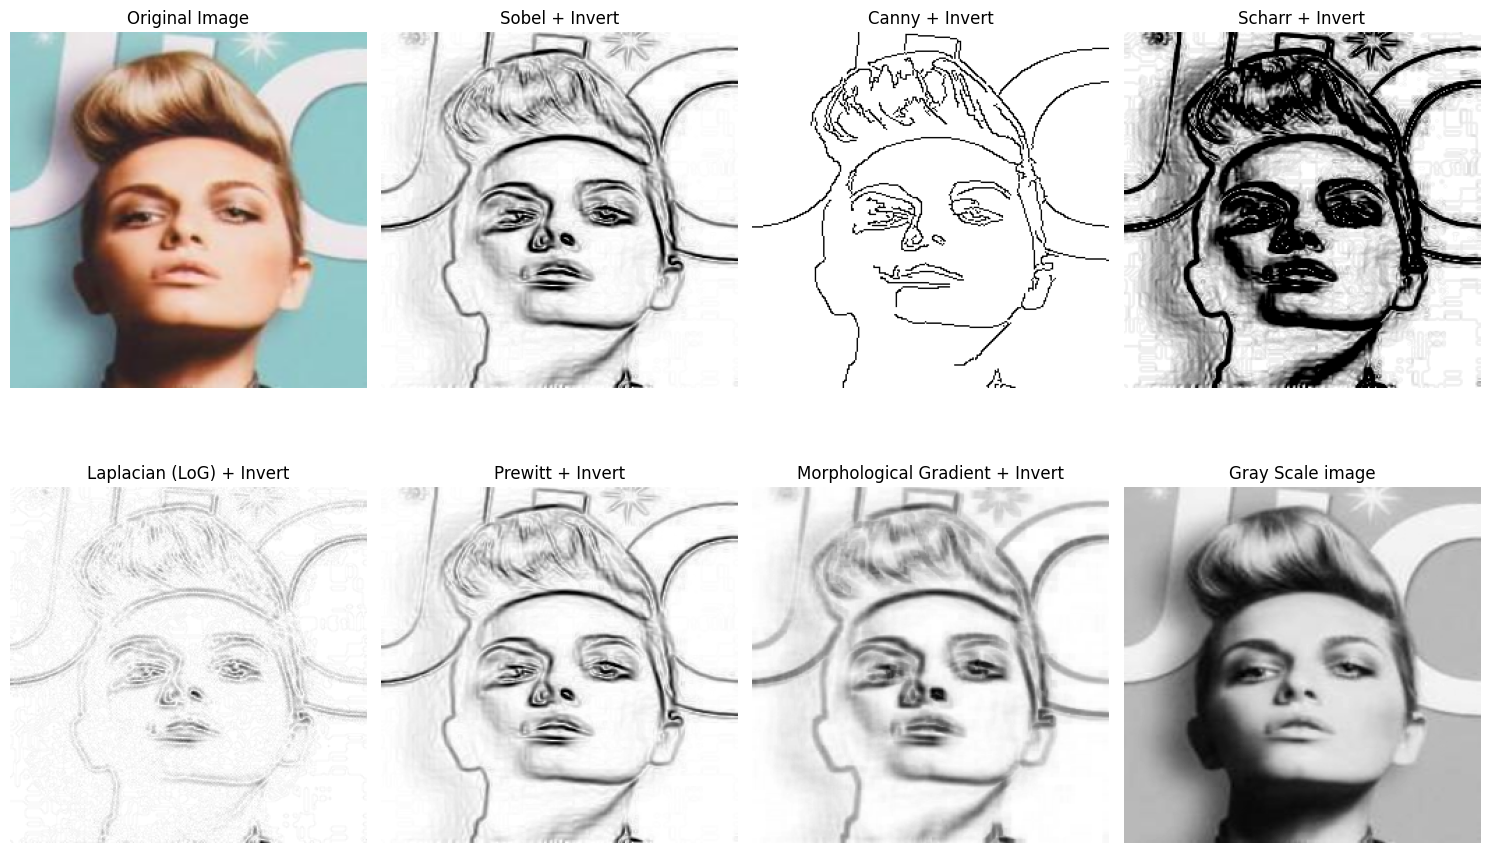

In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
dataset_path = '/content/img_align_celeba/img_align_celeba/'
img_path = os.path.join(dataset_path, '000005.jpg')
img = cv2.imread(img_path)

# Resize the image to 256x256
img_resized = cv2.resize(img, (256, 256))

# Convert the resized image to grayscale
gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_inverted = cv2.bitwise_not(cv2.convertScaleAbs(sobel_combined))

# Canny Edge Detection
edges = cv2.Canny(gray_img, 70, 200)
canny_edges = cv2.bitwise_not(edges)

# Scharr Edge Detection

blurred_img = cv2.GaussianBlur(gray_img, (1, 1), 0)

scharr_x = cv2.Scharr(blurred_img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(blurred_img, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)
scharr_inverted = cv2.bitwise_not(cv2.convertScaleAbs(scharr_combined))

# Laplacian of Gaussian (LoG)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian_inverted = cv2.bitwise_not(cv2.convertScaleAbs(laplacian))

# Prewitt Edge Detection
prewitt_x = cv2.filter2D(gray_img.astype(np.float32), -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray_img.astype(np.float32), -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
prewitt_inverted = cv2.bitwise_not(cv2.convertScaleAbs(prewitt_combined))

# Morphological Gradient
kernel = np.ones((5, 5), np.uint8)
morph_gradient = cv2.morphologyEx(gray_img, cv2.MORPH_GRADIENT, kernel)
morph_gradient_inverted = cv2.bitwise_not(cv2.convertScaleAbs(morph_gradient))


# Display the results
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

axs[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(sobel_inverted, cmap='gray')
axs[0, 1].set_title('Sobel + Invert')
axs[0, 1].axis('off')

axs[0, 2].imshow(canny_edges, cmap='gray')
axs[0, 2].set_title('Canny + Invert')
axs[0, 2].axis('off')

axs[0, 3].imshow(scharr_inverted, cmap='gray')
axs[0, 3].set_title('Scharr + Invert')
axs[0, 3].axis('off')

axs[1, 0].imshow(laplacian_inverted, cmap='gray')
axs[1, 0].set_title('Laplacian (LoG) + Invert')
axs[1, 0].axis('off')

axs[1, 1].imshow(prewitt_inverted, cmap='gray')
axs[1, 1].set_title('Prewitt + Invert')
axs[1, 1].axis('off')

axs[1, 2].imshow(morph_gradient_inverted, cmap='gray')
axs[1, 2].set_title('Morphological Gradient + Invert')
axs[1, 2].axis('off')

axs[1, 3].imshow(gray_img, cmap='gray')
axs[1, 3].set_title('Gray Scale image')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()


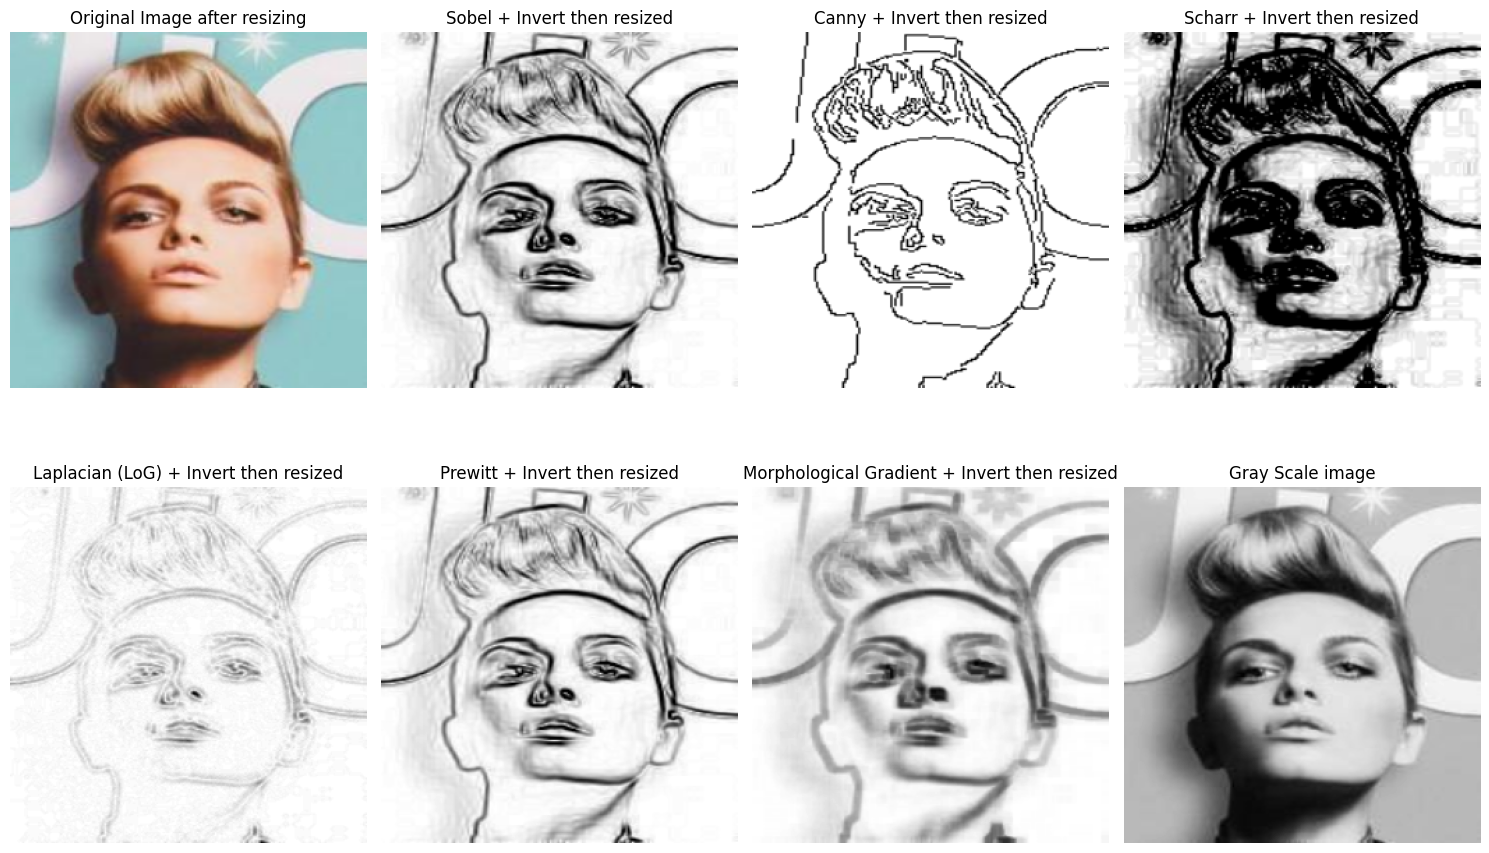

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
dataset_path = '/content/img_align_celeba/img_align_celeba/'
img_path = os.path.join(dataset_path, '000005.jpg')
img = cv2.imread(img_path)



# Convert the resized image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_resized = cv2.resize(gray_img, (256, 256))

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_inverted = cv2.bitwise_not(cv2.convertScaleAbs(sobel_combined))
# Resize the image to 256x256
sobel_resized = cv2.resize(sobel_inverted, (256, 256))

# Canny Edge Detection
edges = cv2.Canny(gray_img, 70, 200)
canny_edges = cv2.bitwise_not(edges)
canny_resized = cv2.resize(canny_edges, (256, 256))

# Scharr Edge Detection

blurred_img = cv2.GaussianBlur(gray_img, (1, 1), 0)

scharr_x = cv2.Scharr(blurred_img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(blurred_img, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)
scharr_inverted = cv2.bitwise_not(cv2.convertScaleAbs(scharr_combined))
scharr_resized = cv2.resize(scharr_inverted, (256, 256))

# Laplacian of Gaussian (LoG)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian_inverted = cv2.bitwise_not(cv2.convertScaleAbs(laplacian))
  # Resize the image to 256x256
laplacian_resized = cv2.resize(laplacian_inverted, (256, 256))

# Prewitt Edge Detection
prewitt_x = cv2.filter2D(gray_img.astype(np.float32), -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray_img.astype(np.float32), -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
prewitt_inverted = cv2.bitwise_not(cv2.convertScaleAbs(prewitt_combined))
prewitt_resized = cv2.resize(prewitt_inverted, (256, 256))

# Morphological Gradient
kernel = np.ones((5, 5), np.uint8)
morph_gradient = cv2.morphologyEx(gray_img, cv2.MORPH_GRADIENT, kernel)
morph_gradient_inverted = cv2.bitwise_not(cv2.convertScaleAbs(morph_gradient))
morph_gradient_resized = cv2.resize(morph_gradient_inverted, (256, 256))


# Display the results
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

axs[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image after resizing')
axs[0, 0].axis('off')

axs[0, 1].imshow(sobel_resized, cmap='gray')
axs[0, 1].set_title('Sobel + Invert then resized')
axs[0, 1].axis('off')

axs[0, 2].imshow(canny_resized, cmap='gray')
axs[0, 2].set_title('Canny + Invert then resized')
axs[0, 2].axis('off')

axs[0, 3].imshow(scharr_resized, cmap='gray')
axs[0, 3].set_title('Scharr + Invert then resized')
axs[0, 3].axis('off')

axs[1, 0].imshow(laplacian_resized, cmap='gray')
axs[1, 0].set_title('Laplacian (LoG) + Invert then resized')
axs[1, 0].axis('off')

axs[1, 1].imshow(prewitt_resized, cmap='gray')
axs[1, 1].set_title('Prewitt + Invert then resized')
axs[1, 1].axis('off')

axs[1, 2].imshow(morph_gradient_resized, cmap='gray')
axs[1, 2].set_title('Morphological Gradient + Invert then resized')
axs[1, 2].axis('off')

axs[1, 3].imshow(gray_img_resized, cmap='gray')
axs[1, 3].set_title('Gray Scale image')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
import os
import cv2
import shutil
from glob import glob

source_dir = '/content/img_align_celeba/img_align_celeba/'
destination_dir = '/content/CelebA/input_images/'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

image_paths = glob(os.path.join(source_dir, '*.jpg'))

batch_size = 1000

for i in range(0, len(image_paths), batch_size):
    batch_files = image_paths[i:i + batch_size]

    for img_path in batch_files:
        img_name = os.path.basename(img_path)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (256, 256))

        resized_img_path = os.path.join(destination_dir, img_name)

        cv2.imwrite(resized_img_path, img_resized)


print(f"Moved {len(image_paths)} files to {destination_dir}")


In [ ]:
image_paths = glob(os.path.join(input_folder, '*.jpg'))

def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    return sobel_combined

def apply_negative(image):
    negative_image = cv2.bitwise_not(image)
    return negative_image

for img_path in image_paths:
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    sobel_img = apply_sobel(img)
    negative_img = apply_negative(sobel_img)
    negative_img_path = os.path.join(output_folder, img_name)
    cv2.imwrite(negative_img_path, negative_img)

print(f"Processed {len(image_paths)} images and saved to {output_folder}")


Processed 202599 images and saved to /content/CelebA/sobel_images


In [ ]:
image_paths1 = glob(os.path.join(source_dir, '*.jpg'))

for img_path in image_paths1:
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    sobel_img = apply_sobel(img)
    negative_img = apply_negative(sobel_img)
    img_resized = cv2.resize(negative_img, (256, 256))
    processed_img_path = os.path.join(output_folder1, img_name)
    cv2.imwrite(processed_img_path, img_resized)
print(f"Processed {len(image_paths1)} images and saved to {output_folder1}")

Processed 202599 images and saved to /content/CelebA/sobel_images1


In [ ]:
import os

image_files = [f for f in os.listdir(output_folder)
if f.endswith('.jpg')]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in Sobel folder: {num_images}")


Number of images in Sobel folder: 202599


In [ ]:
!zip -r input_images.zip /content/CelebA/input_images/
!zip -r sobel_images.zip /content/CelebA/sobel_images/
!zip -r sobel_images1.zip /content/CelebA/sobel_images1/


Streaming output truncated to the last 5000 lines.
  adding: content/CelebA/sobel_images1/154143.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/131171.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/155098.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/115444.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/088836.jpg (deflated 0%)
  adding: content/CelebA/sobel_images1/052929.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/007481.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/082319.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/095380.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/002234.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/054437.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/173087.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/189574.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/195367.jpg (deflated 0%)
  adding: content/CelebA/sobel_images1/169411.jpg (de

In [ ]:
!cp /content/input_images.zip /content/drive/MyDrive/Dataset

In [ ]:
!cp /content/sobel_images.zip /content/drive/MyDrive/Dataset

In [ ]:
!cp /content/sobel_images1.zip /content/drive/MyDrive/Dataset